# Data Preparation
This Jupyter Notebook demonstrates the steps in order to preprocess the data in order to use them after to train the models - algorithms

## 1. Importing Libraries

In [44]:
import numpy as np
import pandas as pd

## 2. Load initial dataset 

In [45]:
data = pd.read_csv('real_data.csv')
data.head() 

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


### Initial Information

In [46]:
# Load the dataset
data = pd.read_csv('real_data.csv')

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Remove any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Remove any leading or trailing whitespace from string values in the data
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Print the shape of the dataset
print("Dataset shape:", data.shape)

# Print the unique emotions
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()

# Print the number of unique emotions
print("Number of unique emotions:", num_unique_emotions)

# Print the distribution of emotions
print("Emotion distribution:\n", data['Emotion'].value_counts())


Missing values in each column:
Emotion    0
RGB1_R     0
RGB1_G     0
RGB1_B     0
RGB2_R     0
RGB2_G     0
RGB2_B     0
RGB3_R     0
RGB3_G     0
RGB3_B     0
dtype: int64
Dataset shape: (1069, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Dynamic and Active' 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy'
 'Fascinating' 'Luxurious' 'Mellow' 'Sweet' 'Cheerful' 'Childlike'
 'Joyful' 'Merry' 'Colourful' 'Brilliant' 'Pretty' 'Sunny' 'Generous'
 'Sweet and Dreamy' 'Sweet - Sour' 'Cute' 'Feminine'
 'Agreeable to the touch' 'Amiable' 'Innocent' 'Smooth' 'Gentle' 'Supple'
 'Soft' 'Charming' 'Gentle and Elegant' 'Mild' 'Genteed' 'Pleasant'
 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate' 'Nostalgic'
 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting' 'Diligent'
 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful' 'Elaborate'
 'Traditional' 'Substantial' 'Heavy and Deep' 'Old - Fashioned' 'Wild'
 'Serious' 'Strong and Robust' 'D

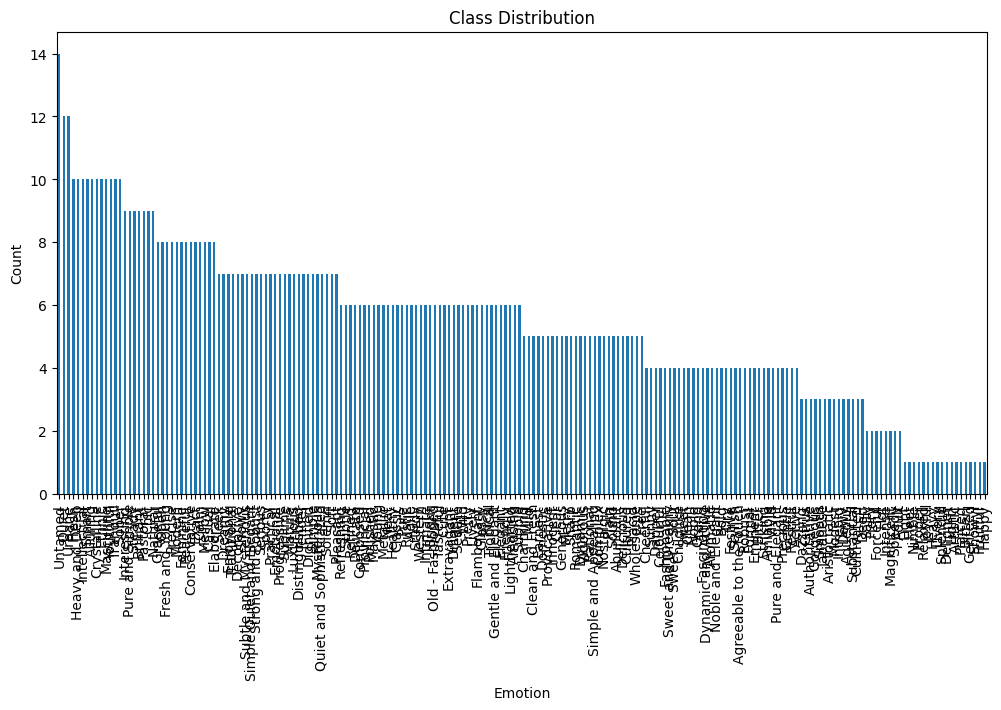

In [47]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### Remove Emotions like " Simple Quiet and Elegant "

In [48]:
# Remove emotions with more than one word
data['Emotion'] = data['Emotion'].apply(lambda x: x if len(x.split()) == 1 else '')

# Drop rows with empty 'Emotion' column
data = data[data['Emotion'] != '']

# Print dataset information
data.head()

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


In [49]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

Dataset shape: (968, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy' 'Fascinating' 'Luxurious'
 'Mellow' 'Sweet' 'Cheerful' 'Childlike' 'Joyful' 'Merry' 'Colourful'
 'Brilliant' 'Pretty' 'Sunny' 'Generous' 'Cute' 'Feminine' 'Amiable'
 'Innocent' 'Smooth' 'Gentle' 'Supple' 'Soft' 'Charming' 'Mild' 'Genteed'
 'Pleasant' 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate'
 'Nostalgic' 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting'
 'Diligent' 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful'
 'Elaborate' 'Traditional' 'Substantial' 'Wild' 'Serious' 'Dazzling'
 'Flamboyant' 'Abundant' 'Tropical' 'Enjoyable' 'Aromatic' 'Friendly'
 'Open' 'Lighthearted' 'Amusing' 'Healthy' 'Domestic' 'Restful' 'Intimate'
 'Free' 'Dreamy' 'Delicate' 'Dry' 'Natural' 'Wholesome' 'Provincial'
 'Placid' 'Modest' 'Chic' 'Aqueous' 'Sober' 'Classic' 'Rustic' 'Practical'
 'Grand' 'Pastoral' 'Sturdy' 'Conserv

### Check for duplicated Emotions

In [50]:
# Check for duplicate rows considering all columns
duplicate_rows = data[data.duplicated(keep=False)]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
    print(f"Total number of duplicate rows: {len(duplicate_rows)}")
else:
    print("\nNo duplicate rows found.")


Duplicate rows found:
          Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
4        Vigorous     229       0      13     255     242       0      12   
52       Pleasant     234     124     104     208     194     142     215   
56      Emotional     215     188     188     234     124     104     145   
59       Graceful     234     124     104     215     188     188     115   
101      Tropical     212       0      57     255     127       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
1000        Clear     153     215     179     255     255     255     204   
1001       Simple     222     222     222     255     255     255     123   
1002        Fresh     179     221      61     255     255     255     128   
1003  Crystalline     153     215     179     255     255     255     128   
1004         Chic     145     111      93     222     222     222     121   

      RGB3_G  RGB3_B  
4         32     120  
52    

### Remove duplicated Rows

In [51]:
# Remove duplicate rows keeping only the first occurrence
data = data.drop_duplicates(keep='first')

# Check for duplicate rows considering all columns
duplicate_rows = data[data.duplicated(keep=False)]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
    print(f"Total number of duplicate rows: {len(duplicate_rows)}")
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


### Information now

In [52]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

data.to_csv('cleaned_data1.csv', index=False)

Dataset shape: (918, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy' 'Fascinating' 'Luxurious'
 'Mellow' 'Sweet' 'Cheerful' 'Childlike' 'Joyful' 'Merry' 'Colourful'
 'Brilliant' 'Pretty' 'Sunny' 'Generous' 'Cute' 'Feminine' 'Amiable'
 'Innocent' 'Smooth' 'Gentle' 'Supple' 'Soft' 'Charming' 'Mild' 'Genteed'
 'Pleasant' 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate'
 'Nostalgic' 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting'
 'Diligent' 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful'
 'Elaborate' 'Traditional' 'Substantial' 'Wild' 'Serious' 'Dazzling'
 'Flamboyant' 'Abundant' 'Tropical' 'Enjoyable' 'Aromatic' 'Friendly'
 'Open' 'Lighthearted' 'Amusing' 'Healthy' 'Domestic' 'Restful' 'Intimate'
 'Free' 'Dreamy' 'Delicate' 'Dry' 'Natural' 'Wholesome' 'Provincial'
 'Placid' 'Modest' 'Chic' 'Aqueous' 'Sober' 'Classic' 'Rustic' 'Practical'
 'Grand' 'Pastoral' 'Sturdy' 'Conserv

#### Check if we have for the same set of RGB values different Emotion value

In [53]:
# Load the data
data1 = pd.read_csv('cleaned_data1.csv')

# Group the data by RGB values
rgb_groups = data1.groupby(['RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])

# Check for groups with multiple rows
duplicate_rgb_groups = rgb_groups.filter(lambda x: len(x) > 1)

if not duplicate_rgb_groups.empty:
    print("\nSame RGB values found on multiple lines:")
    duplicate_rgb_values = duplicate_rgb_groups.groupby(['RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])
    print(f"Number of duplicate RGB values: {len(duplicate_rgb_values)}")
    for rgb_values, group in duplicate_rgb_values:
        lines = group.index.tolist()
        emotions = group['Emotion'].unique()
        print(f"RGB values: {', '.join(map(str, rgb_values))} - Lines: {', '.join(map(str, lines))} - Emotions: {', '.join(emotions)}")


Same RGB values found on multiple lines:
Number of duplicate RGB values: 23
RGB values: 4, 36, 65, 222, 222, 222, 116, 139, 116 - Lines: 589, 869 - Emotions: Intellectual, Youthful
RGB values: 57, 89, 153, 255, 255, 255, 103, 195, 183 - Lines: 616, 617 - Emotions: Pure, Refreshing
RGB values: 95, 35, 141, 187, 45, 105, 37, 95, 81 - Lines: 483, 525 - Emotions: Mysterious, Noble
RGB values: 112, 41, 3, 130, 99, 61, 1, 47, 45 - Lines: 498, 501 - Emotions: Intrepid, Conservative
RGB values: 112, 41, 3, 149, 78, 29, 126, 100, 12 - Lines: 148, 152 - Emotions: Classic, Rustic
RGB values: 128, 166, 206, 255, 255, 255, 103, 195, 183 - Lines: 537, 538 - Emotions: Crystalline, Speedy
RGB values: 138, 0, 7, 191, 169, 11, 72, 13, 104 - Lines: 66, 755 - Emotions: Extravagant, Luxurious
RGB values: 153, 166, 74, 255, 250, 184, 116, 196, 118 - Lines: 106, 210 - Emotions: Lighthearted, Open
RGB values: 198, 183, 186, 204, 236, 232, 121, 123, 131 - Lines: 731, 732 - Emotions: Noble, Chic
RGB values: 20

#### Count the number of occurrences of each distinct emotion


In [54]:
data1 = pd.read_csv('cleaned_data1.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data1['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data1['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

emotion_counts.head()

Counts of each emotion:
Emotion
Untamed         14
Urbane          12
Ethnic          10
Tranquil        10
Intellectual    10
                ..
Artistic         1
Showyl           1
Genteed          1
Heavy            1
Happy            1
Name: count, Length: 181, dtype: int64
Number of distinct emotions:
181


Emotion
Untamed         14
Urbane          12
Ethnic          10
Tranquil        10
Intellectual    10
Name: count, dtype: int64

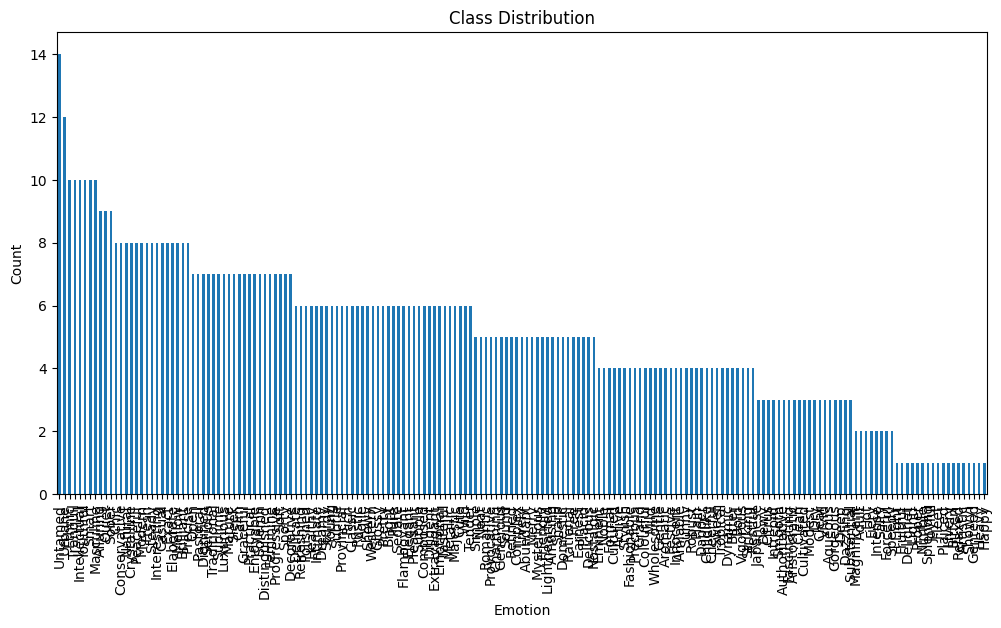

In [55]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data1['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Oversampling using SMOTE

In [60]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
df = pd.read_csv('cleaned_data1.csv')

# Separate features and target
X = df.drop('Emotion', axis=1)  # Features
y = df['Emotion']  # Target

# Print the initial class distribution
print("Initial class distribution:")
print(Counter(y))

# Apply SMOTE with fewer neighbors
smote = SMOTE(k_neighbors=1)  # Adjust based on your minimum class size
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the new class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))

Initial class distribution:
Counter({'Untamed': 14, 'Urbane': 12, 'Ethnic': 10, 'Youthful': 10, 'Tranquil': 10, 'Smart': 10, 'Intellectual': 10, 'Masculine': 10, 'Alluring': 9, 'Sober': 9, 'Quiet': 9, 'Mellow': 8, 'Brilliant': 8, 'Casual': 8, 'Interesting': 8, 'Elaborate': 8, 'Natural': 8, 'Chic': 8, 'Conservative': 8, 'Peaceful': 8, 'Fresh': 8, 'Steady': 8, 'Crystalline': 8, 'Modern': 8, 'Exact': 8, 'Precise': 8, 'Mature': 7, 'Luxurious': 7, 'Feminine': 7, 'Soft': 7, 'Graceful': 7, 'Calm': 7, 'Sleek': 7, 'Traditional': 7, 'Serious': 7, 'Enjoyable': 7, 'Open': 7, 'Practical': 7, 'Pastoral': 7, 'Sporty': 7, 'Decorative': 7, 'Solemn': 7, 'Progressive': 7, 'Dignified': 7, 'Distinguished': 7, 'Sublime': 7, 'Bright': 6, 'Rich': 6, 'Glossy': 6, 'Pretty': 6, 'Cute': 6, 'Supple': 6, 'Pleasant': 6, 'Tender': 6, 'Emotional': 6, 'Sedate': 6, 'Elegant': 6, 'Diligent': 6, 'Extravagant': 6, 'Tasteful': 6, 'Wild': 6, 'Flamboyant': 6, 'Healthy': 6, 'Intimate': 6, 'Dreamy': 6, 'Delicate': 6, 'Provincia

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1

#### Oversampling using ADASYN

In [61]:
import pandas as pd
from imblearn.over_sampling import ADASYN
from collections import Counter

# Load the dataset
df = pd.read_csv('cleaned_data1.csv')

# Separate features and target
X = df.drop('Emotion', axis=1)  # Features
y = df['Emotion']  # Target

# Print the initial class distribution
print("Initial class distribution:")
print(Counter(y))

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=1, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Print the new class distribution after ADASYN
print("\nClass distribution after ADASYN:")
print(Counter(y_resampled))

Initial class distribution:
Counter({'Untamed': 14, 'Urbane': 12, 'Ethnic': 10, 'Youthful': 10, 'Tranquil': 10, 'Smart': 10, 'Intellectual': 10, 'Masculine': 10, 'Alluring': 9, 'Sober': 9, 'Quiet': 9, 'Mellow': 8, 'Brilliant': 8, 'Casual': 8, 'Interesting': 8, 'Elaborate': 8, 'Natural': 8, 'Chic': 8, 'Conservative': 8, 'Peaceful': 8, 'Fresh': 8, 'Steady': 8, 'Crystalline': 8, 'Modern': 8, 'Exact': 8, 'Precise': 8, 'Mature': 7, 'Luxurious': 7, 'Feminine': 7, 'Soft': 7, 'Graceful': 7, 'Calm': 7, 'Sleek': 7, 'Traditional': 7, 'Serious': 7, 'Enjoyable': 7, 'Open': 7, 'Practical': 7, 'Pastoral': 7, 'Sporty': 7, 'Decorative': 7, 'Solemn': 7, 'Progressive': 7, 'Dignified': 7, 'Distinguished': 7, 'Sublime': 7, 'Bright': 6, 'Rich': 6, 'Glossy': 6, 'Pretty': 6, 'Cute': 6, 'Supple': 6, 'Pleasant': 6, 'Tender': 6, 'Emotional': 6, 'Sedate': 6, 'Elegant': 6, 'Diligent': 6, 'Extravagant': 6, 'Tasteful': 6, 'Wild': 6, 'Flamboyant': 6, 'Healthy': 6, 'Intimate': 6, 'Dreamy': 6, 'Delicate': 6, 'Provincia

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1